# Ejercicio 4: Derivación e integración

## Derivación
1. Escribe una función que reciba como argumento otra función y un número real y que evalúe
la derivada de esa función en el punto dado sin utilizar ninguna librería externa de Julia,
el resultado debe ser otro número real. Prueba tu implementación con los siguientes valores:
f(x) = cos(x) en el punto x = 2, el resultado debería aproximarse a −0.909297... (3 puntos).

2. Añade un parámetro n a la función anterior que sirva para mejorar la precisión de cálculo,
¿qué valor debe tomar n para que el cálculo de la derivada anterior sea exacta en al menos 5
dígitos? Justifica tu respuesta con código (1 punto).

3. Añade otra condición a la función del punto 1 que imprima un mensaje de error cuando la
función no es derivable en ese punto. Prueba tu código con la función f(x) = log(x) en los
puntos x = 0 y x = 1 (1 punto).

4. Desarrolla un código que visualice la gráfica de una función junto con la recta tangente a un
punto en su dominio, incluye en tu visualización una leyenda que muestre la pendiente de la
recta tangente. Prueba tu implementación con las funciones descritas en los puntos anteriores
(2 puntos).

5. (Bonus). Realiza una animación que muestre el desplazamiento de la recta tangente a una
función a lo largo de un intervalo, puedes usar como referencia el siguiente video:

Aplica tu código a la función $f(x) = 4 − x{^2}$ en el intervalo [−2, 2] (2 puntos).

## Integración

1. Escribe la función ‘integrar‘ con las siguientes características:
function integrar(func, a, b, n)
Evalúa la integral de una función en un intervalo dado con cierta precisión.

#### Parámetros
-------

func : function
Una función de julia que toma floats como valores
a : float
El limite inferior a integrar
b : float
El limite superior a integrar
n : integer
La precisión del cálculo

#### Returns
-------

float
El resultado de integrar la función ’func’ en el intervalo [a, b]
con precisión n.

Prueba tu implementación con los siguientes valores: f(x) = cos(x) en el intervalo [0, π], el
resultado debería aproximarse a 0.


#### Inciso 1:
Escribe una función que reciba como argumento otra función y un número real y que evalúe la derivada de esa función en el punto dado sin utilizar ninguna librería externa de Julia, el resultado debe ser otro número real. Prueba tu implementación con los siguientes valores: f(x) = cos(x) en el punto x = 2, el resultado debería aproximarse a −0.909297...

In [7]:
# Partimos de la definición de la derivada en un punto: f'(x)=lim(h→0)[f(x+h)-f(x)]/h. A partir de esta definción, se puede elegir
# un valor pequeño de h que nos sirva de aproximación. Por otra parte, para declarar la función que recibe como argumento otra
# función y un número real se emplea la sintaxis "function nombre()". El primer argumento es la función f, que en cuestión 
# es cos(x) a la cual se le quiere obtener su derivada y como argumento dos el valor real o de tipo Float 64 que en este caso 
# es x=2.

function derivada(f::Function, x::Float64)
    h = 0.001
    return (f(x+h) - f(x)) / h
end

derivada (generic function with 1 method)

In [8]:
# Para probar la función con la función f(x) = cos(x) en el punto x=2, podemos hacer lo siguiente:

f(x) = cos(x)
x = 2.0
derivada(f, x)

-0.9090892018750463

<font color='orange'> Bien. <b>(1/1 punto)</b></font>

#### Inciso 2:
Añade un parámetro n a la función anterior que sirva para mejorar la precisión de cálculo,
¿qué valor debe tomar n para que el cálculo de la derivada anterior sea exacta en al menos 5
dígitos? Justifica tu respuesta con código (1 punto).

In [9]:
# En primer lugar vamos a partir de la estructura del ejercicio anterior, en la que teníamos una función con dos parámetros
# la función f(x)=cos(x), y el valor de x=2. Pero ahora se requiere de un tercer parámetro "n" el cual dependiendo de su valor,
# será la aproximación que vamos a obtner de la derivada, sin embargo, para incluir este tercer parámetro el cual debe tomar 
# valores enteros positivos (Int64) se empleará el método de la "Extrapolación de Richardson", el cual utiliza dos estimaciones
# de la derivada para calcular una tercera aproximación más exacta, la cual está dada por la fórmula:
# D≈(4*D(h2)-D*(h1))/3 donde D es la derivada en cuestión evaluada en un cierto tamaño de h2 y h1 respectivamente.

# Entonces la idea es calcular la derivada usando dos diferentes tamaños, "h" y "h/2" y luego usar estos dos valores para estimar 
# el valor con mayor precisión de la derivada.


function derivada_aproximada(f, x::Real, n::Int=5)
    h = 0.000001
    D1 = (f(x + h) - f(x)) / h  #Se declara D1 a partir únicamente de la definción de la derivada
    for i in 1:n                # n corre con valores desde 1 hasta n, hasta conseguir una estimación de 5 dígitos
        h /= 2
        D2 = (f(x + h) - f(x)) / h  #Se declara a D2, utilizando también la definción de la derivada, pero con un valor de "h/2"
        D3 = (4D2 - D1)/3       # Finalmente D3 es la fórmula de la aproximación de Richardson.
        
        return D3
    end
end


derivada_aproximada (generic function with 2 methods)

Por otra parte, para encontrar el valor mínimo n necesario para que el cálculo de la derivada sea exacta en al menos 5 dígitos, se puede hacer la estimación utilizando la siguiente fórmula:

`error=O(h^n)`

donde O es la notación de orden, que indica cómo se comporta el error en función de h. En este caso, se sabe que h = 0.000001, y se quiere encontrar n tal que el error sea menor que 0.00001 (5 dígitos de precisión).

Entonces, se puede despejar n de la siguiente manera:

error = O(h^n) 
⇒ 0.00001 = O(0.0001^n)
⇒ log10(0.00001) = n * log10(0.0001)
⇒ n = log10(0.00001) / log10(0.0001)
⇒ n ≈ 5.0

Por lo tanto, se necesita un valor mínimo de n igual a 5 para que el cálculo de la derivada sea exacta en al menos 5 dígitos.

In [10]:
# Con el resultado anterior, se puede observar que el valor de n=5 se puede incluir dentro del arreglo de la función 
# "derivada aproximada" para obtner un valor estimado de al menos 5 dígitos.

f(x) = cos(x)
derivada_aproximada(f, 2, 5)

-0.9092973575578848

<font color='orange'> ¡Excelente respuesta! Y bastante original, aunque hubiera sido preferible que agregaran fuentes para consultar las afirmaciones que hacen sobre la Extrapolación de Richardson. <b>(1.5/1 punto)</b></font>

#### Inciso 3:

Añade otra condición a la función del punto 1 que imprima un mensaje de error cuando la
función no es derivable en ese punto. Prueba tu código con la función f(x) = log(x) en los
puntos x = 0 y x = 1.

In [11]:
# Se requiere utilizar la misma estructura que en el inciso 1, con la diferencia que la función es llamada "derivada 1" para evitar
# problemas de reasiganción de valor de la función ya que ahora la función f1(x)=log(x).

function derivada1(f1::Function, x::Float64)
    h = 0.0001
    return (f1(x+h) - f1(x)) / h
end

derivada1 (generic function with 1 method)

In [12]:
# Para añadir la la condición de un mensaje de error, se emplean condicionales, en este caso "if", si x=0.0, entonces para 
# obtener un mensaje de error debido a que no se puede evaluar el valor de x=0.0 en la derivada, se emplea "println" y dentro 
# de los paréntesis el mensaje.

f1(x) = log(x)
    
if x == 0.0
    
    derivada1(f1, x) 
    
else  
    println("¡error!")    
end

¡error!


In [13]:
#Por otra parte la derivada de log(x) está bien definida cuando se evalua en x=1.0, por lo que para notar que sí se puede evaluar
# también se emplea una condicional "if", asi como "println" con el mensaje correspondiente de que sí esta definida la 
# la derivada para x=1.

f1(x) = log(x)
if x == 1.0
 derivada1(f1, x) 
    
    println("¡la derivada está bien definida para x igual a 1!")
    
end
f1(x) = log(x)
x = 1.0
derivada1(f1, x)

0.9999500033329731

<font color='orange'> Más bien había que agregar una condición a la función <code>derivada</code> que habías definido en el inciso 1 para que detectara si, para cualquier función y punto dado, dicha función es derivable en ese punto o no y, de lo contrario, marcara un error. Esto se puede hacer, por ejemplo, con las <i>keywords</i> <code><b>try</b></code> y <code><b>catch</b></code>. Les recomiendo consultar <a href="https://docs.julialang.org/en/v1/manual/control-flow/#Exception-Handling">esta liga de la documentación de Julia</a> para aprender más al respecto. Aún así, el planteamiento del Ejercicio fue un poco ambiguo en este sentido. <b>(0.5/1 punto)</b> </font>

#### Inciso 4
Desarrolla un código que visualice la gráfica de una función junto con la recta tangente a un punto en su dominio, incluye en tu visualización una leyenda que muestre la pendiente de la recta tangente. Prueba tu implementación con las funciones descritas en los puntos anteriores.

**Nota**: Este ejercicio se realizó en Pluto, pero también se instaló la paquetería de Plots en Julia para visualizarlo desde Jupyter notebook.

In [3]:
import Pkg
Pkg.add("Plots")

   Resolving package versions...
   Installed GPUArraysCore ──── v0.1.5
   Installed FFMPEG ─────────── v0.2.4
   Installed Adapt ──────────── v3.6.2
   Installed IterTools ──────── v1.8.0
   Installed GeometryBasics ─── v0.3.13
   Installed Latexify ───────── v0.15.21
   Installed PlotThemes ─────── v2.0.1
   Installed EarCut_jll ─────── v2.2.4+0
   Installed StaticArraysCore ─ v1.4.0
   Installed Plots ──────────── v1.15.2
   Installed StructArrays ───── v0.6.15
   Installed StaticArrays ───── v1.5.26
   Installed RecipesPipeline ── v0.3.7
   Installed GR ─────────────── v0.49.1
    Updating `~/.julia/environments/v1.9/Project.toml`
⌃ [91a5bcdd] + Plots v1.15.2
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [79e6a3ab] + Adapt v3.6.2
  [b99e7846] + BinaryProvider v0.5.10
  [35d6a980] + ColorSchemes v3.21.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.9.10
  [5ae59095] + Colors v0.12.10
  [34da2185] + Compat v4.6.1
⌅ [d38c429a] + Contour v0.5.7
  [864

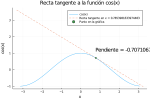

In [4]:
using Plots 

begin 
# Definimos la función
f(x) = cos(x)

# Elegimos un punto en la gráfica para mostrar la línea tangente
x0 = π/4

# Definimos la función de recta tangente
slope = -sin(x0)
g(x) = f(x0) + slope*(x - x0)

# Trazamos la función y la recta tangente
plot(f,-π:0.1:π, label="cos(x)", title="Recta tangente a la función cos(x)", xlabel="x", ylabel="cos(x)")
plot!(g, label="Recta tangente en x = $(x0)", linestyle=:dash)
scatter!([x0],[f(x0)], label="Punto en la gráfica")
annotate!([(x0, f(x0) + 0.5, text("Pendiente = $slope", :left))])

end

# Primero se define la función f(x) = cos(x). Luego elegimos un punto x0 = π/4 en el gráfico de la función para mostrar 
# la línea tangente. Podemos calcular la pendiente de la recta tangente en este punto usando la derivada de f(x), que es -sin(x). 
# Entonces, definimos la función de línea tangente g(x) como f(x0) + pendiente*(x - x0).

# Luego, graficamos la función f(x) usando plot(f, label="cos(x)"). También trazamos la función de línea tangente g(x) usando
# plot!(g, label="Línea tangente en x = $(x0)", linestyle=:dash). La función plot!() se utiliza para agregar el gráfico de línea 
# tangente al gráfico existente de f(x). El argumento linestyle=:dash se usa para hacer que la línea tangente sea discontinua.

# También dispersamos el punto en el gráfico usando scatter!([x0],[f(x0)], label="Point on graph"), y anotamos la pendiente de la recta 
# tangente usando annotate!([(x0, f( x0) + 0.5, text("Pendiente = $pendiente", :izquierda))]). La función annotate!() se usa 
# para agregar una anotación de texto al gráfico, especificando la pendiente de la línea tangente.


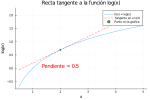

In [5]:
using Plots

begin

# Definimos la función
h(x) = log(x)

# Punto en el dominio donde se desea trazar la línea tangente
x1 = 2.0

# Cálculo de la pendiente de la línea tangente en el punto x0
m = 1 / x1

# Cálculo de la ordenada al origen de la línea tangente
b = h(x1) - m * x1

# Definir la recta tangente
p(x) = m*x + b

# Definir los valores de x para graficar la función y la recta tangente
xmin, xmax = 0.5, 5.0
xvals = range(xmin, xmax, length=100)

# Graficar la función y la recta tangente
plot(xvals, h.(xvals), label="h(x) = log(x)", title="Recta tangente a la función log(x)", xlabel="x", ylabel="log(x)")
plot!(xvals, p.(xvals), label="Tangente en x=$(x1)", linestyle=:dash, color=:red)
scatter!([x1],[h(x1)], label="Punto en la gráfica")

# Mostrar la leyenda
annotate!([(x1, f(x1) + 0.5, text("Pendiente = $(m)", :red))])
    
end

# En este código, se utilizó la libreria Plots para realizar la gráfica. En primer
# luego se definió la función h(x)=log(x) y un punto arbitrario en el dominio de esta #función, en este caso se eligió x1=2.0.

# Por otro lado, se calculó la pendiente de la línea tangente en el punto x1 utilizando la fórmula m=f'(x1)=1/x1, donde f'(x) 
# representa la derivada de la función f(x) con respecto a x. También se calcula la ordenada al origen de la línea tangente 
# utilizando la fórmula b = f(x0) - m*x1.

# Luego, se definió la función p(x) = m*x + b que representa la recta tangente y se definen los valores de x para graficar 
# la función y la recta tangente utilizando la función range() de Julia.

# Finalmente, se grafica la función y la recta tangente utilizando las funciones plot() y plot!() de Plots, se agrega la 
# leyenda utilizando la función annotate!(),

<font color='orange'> Bien, aunque no sé por qué las gráficas aparecen en miniatura; tuve que abrir otro programa y verlas desde ahí. <b>(2/2 puntos)</b></font>

## Integración

Ejercicio 1

In [20]:
function integral(func, a, b, n)
    dx = (b - a) / n  # el ancho de cada subintervalo es la diferencia entre el límite mayor menos el límite menor, todo eso
                      # dividido entre n (precisón del cálculo).
    sum = 0.0  # se inicializa la suma 
    for i in 1:n
        xi = a + (i - 0.5) * dx  # punto medio del i-ésimo subintervalo
        sum += func(xi) * dx  # suma el área del i-ésimo rectángulo
    end
    return sum
end

# La idea detrás de esta implementación es aproximar la integral de "func" en el intervalo [a, b] dividiéndola en n subintervalos 
# de ancho diferencial de x "dx", y aproximando el área bajo "func" en cada subintervalo por el área de un rectángulo con altura
# func(xi) y ancho dx, donde "xi" es el punto medio del subintervalo.

# Por otra parte, sabemos que usa integral se puede aproximar como el límite de cuando x tiende a cierto valor de una suma, por lo
# que las sumas de todos los rectángulos da una estimación de la integral. Cuanto mayor sea el valor de n, más precisa será
# la aproximación.

integral (generic function with 1 method)

In [21]:

f(x) = cos(x)
a = 0.0
b = π
n = 10000000

resultado = integral(f, a, b, n)
println("Resultado: $resultado")  # debe estar cerca a 0

#Finalmente definimos la variable resultado como la función integral que consta de cuatro parámetros, la función cos(x), 
# los límites de integración a y b y finalmente n, la precisión.


Resultado: 3.2183662693549423e-16


<font color='orange'> Bien hecho. <b>(3/3 puntos)</b></font>

<font color='orange'>Calificación de este <i>notebook</i>: <b>8</b>. La calificación de su proyecto intermedio es el promedio de los dos <i>notebooks</i> que entregaron.</font>

<font color='orange'> Nota: Por favor tengan más consideración y cuidado al momento de nombrar sus archivos y referenciarlos en sus trabajos. En su entrega dijeron que su solución estaba en <a href="https://github.com/Joshuamaximo12/ac-joshua/blob/main/ejercicio%204.dir">https://github.com/Joshuamaximo12/ac-joshua/blob/main/ejercicio%204.dir</a>, pero esto no era así. Al clonar su repositorio, no me quedó claro cuál archivo debía de calificar dentro de todos los que empezaban con <code>ejercicio4</code> ni tampoco si se suponían que eran <i>notebooks</i> de Julia o de Pluto, así que intenté de todo. Al final, resultó que era el archivo <code>Untitled.ipynb</code>, al cual ya le cambié el nombre para que fuera más claro, pero en eso se me fue mucho tiempo.</font>